# Read the output of a set of Geant4 PositronSource simulations and plot them

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib ipympl
from matplotlib.ticker import AutoMinorLocator
import os
import uproot
import math
import re
from scipy import interpolate
import json 

from G4_utils import *
#from G4_read_output_files import *

# Set the number of digits to show in pandas dataframes
pd.set_option('display.float_format', '{:.2f}'.format)

# Ignore SettingWithCopyWarning in Pandas
pd.options.mode.chained_assignment = None  #default='warn'

## Set input path and base filename

In [2]:
#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W5-20mm_conventional_gp/analysis_output/"
#basename_G4 = "2.86GeV_sigma1.0mm_W5-20mm_conventional"
#plot_title = "Conventional Source, e- beam at 2.86 GeV (r.m.s. size 1.0 mm), room temperature"
#fig_height = 700

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W8-16mm_crystalline_gp/analysis_output/"
#basename_G4 = "2.86GeV_sigma1.0mm_W8-16mm_crystalline"
#plot_title = "crystalline source, e- beam at 2.86 GeV (r.m.s. size 1.0 mm), room temperature"
#fig_height = 400

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W12mm_crystalline_mis_HT_gp/analysis_output/"
#basename_G4 = "2.86GeV_sigma1.0mm_W12mm_crystalline_mis_HT"
#plot_title = "crystalline source, e- beam at 2.86 GeV (r.m.s. size 1.0 mm), W12mm, misalignment study, high temperature (600 K)"
#fig_height = 450

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W4-24mm_conventional_gp/analysis_output/"
#basename_G4 = "6GeV_sigma0.5mm_W4-24mm_conventional"
#plot_title = "Conventional Source, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#correct_values = True
#fig_height = 800

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W9-15mm_crystalline_gp/analysis_output/"
#basename_G4 = "6GeV_sigma0.5mm_W9-15mm_crystalline"
#plot_title = "crystalline source, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#fig_height = 300

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W12mm_crystalline_mis_HT_gp/analysis_output/"
#basename_G4 = "6GeV_sigma0.5mm_W12mm_crystalline_mis_HT"
#plot_title = "crystalline source, e- beam at 6 GeV (r.m.s. size 0.5 mm), W12mm, misalignment study, high temperature (600 K)"
#fig_height = 450

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator1-2mm_D0cm_target11.6mm_gp/analysis_output/"
#basename_G4 = "6GeV_sigma0.5mm_W_radiator1-2mm_D0cm_target11.6mm"
#plot_title = "Hybrid Source, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#fig_height = 450

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator2mm_D0cm_target6-12mm_gp/analysis_output/"
#basename_G4 = "6GeV_sigma0.5mm_W_radiator2mm_D0cm_target6-12mm"
#plot_title = "Hybrid Source, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#fig_height = 350

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator2mm_D50cm_target6-15mm_gp/analysis_output/"
#basename_G4 = "6GeV_sigma0.5mm_W_radiator2mm_D50cm_target6-15mm"
#plot_title = "Hybrid Source, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#fig_height = 400

path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/test_G4_v2_2.86GeV/analysis_output/"
basename_G4 = "2.86GeV_W1.50mm_D0.1cm_target10.50mm"
plot_title = "Hybrid Source, e- beam at 2.86 GeV (r.m.s. size 1.0 mm), room temperature"
fig_height = 200


Ne = 1e4 #Number of simulated events (electrons)

## Save and export settings

In [3]:
save_results = True
outpath = path_G4

## Get a dataframe with the results of a set of Geant4 PositronSource simulations

In [4]:
results_file = path_G4 + 'results.json'
if os.path.exists(results_file):
    df_G4 = pd.read_json(results_file)
else:
    df_G4 = pd.read_json(path_G4 + 'results_' + basename_G4 + '.json')
df_G4.insert(8, 'Edep_rad[GeV/e-]', np.array(df_G4['Edep_rad[MeV/e-]'])*0.001)
df_G4 = df_G4.drop(columns=['Edep_rad[MeV/e-]'])
df_G4

,case,yield_e+,yield_e-,yield_ph,yield_n,e+_mean_E[MeV],e+_spread_E[sigma/mu],e+_mean_div_fit[mrad],Edep_rad[GeV/e-],e+_mean_size_fit[mm],Edep_conv[GeV/e-],PEDD[MeV/(mm^3*e-)]
0,2.86GeV_W1.50mm_D0.1cm_target10.50mm,7.37,9.37,146.76,0.11,43.64,1.90,33.62,0.01,1.16,0.57,7.34


## Substitute some values (to avoid outliers)

In [5]:
if 'correct_values' in locals() and correct_values == True:
    i2c = [12, 17]
    for i in i2c:
        df_G4.iloc[i,7] = (df_G4.iloc[i-2,7] + df_G4.iloc[i-1,7] + df_G4.iloc[i+1,7] + df_G4.iloc[i+2,7]) / 4 #for conventional
else:
    print("No automatic correction for outliers applied. Manual correction may be carried out, PAY ATTENTION!")
    #i = 7
    #df_G4.iloc[i,7] = (df_G4.iloc[i-2,7] + df_G4.iloc[i-1,7] + df_G4.iloc[i+1,7] + df_G4.iloc[i+2,7]) / 4 #Hybrid, D=50cm

No automatic correction for outliers applied. Manual correction may be carried out, PAY ATTENTION!


## Calculate the rotation value for xticks

In [6]:
len_th = 10
rot_value = 45 if len(df_G4.iloc[-1].case) > len_th or len(df_G4.iloc[1:]) > len_th else 0

if len(df_G4.iloc[0].case) > len_th:
    if 'conventional' in path_G4 or 'crystalline' in path_G4:
        case_list_short = [item.split('W')[1].split('_')[0] for item in df_G4.case.values] #conventional or crystalline
        if 'mis' in path_G4:
            case_list_short = [item.split('mis')[1].split('_')[0] for item in df_G4.case.values] #crystalline, misalignment - HT
    else:
        case_list_short = [item.split('target')[1] for item in df_G4.case.values] #Hybrid
    df_G4.case = case_list_short
    print(case_list_short)

['10.50mm']


## Change the column names

In [7]:
df_col_map = {
    'yield_ph' : 'photon Yield',
    'yield_n' : 'neutron Yield',
    'yield_e-' : 'electron Yield',
    'yield_e+' : 'positron Yield',
    'e+_mean_size_fit[mm]' : "e+ beam mean size [mm]",
    'e+_mean_div_fit[mrad]' : "e+ beam mean div [mrad]",  
    'e+_mean_E[MeV]' : "e+ beam mean E [MeV]",
    'e+_spread_E[sigma/mu]' : "e+ beam spread E",
    'Edep_rad[GeV/e-]' : 'Edep_rad [GeV/e-]',
    'Edep_conv[GeV/e-]' : 'Edep_conv [GeV/e-]',
    'PEDD[MeV/(mm^3*e-)]' : 'PEDD [MeV / (mm^3 e-)]',
}

df_plot = df_G4.rename(columns=df_col_map)

## Save the dataframe to a figure

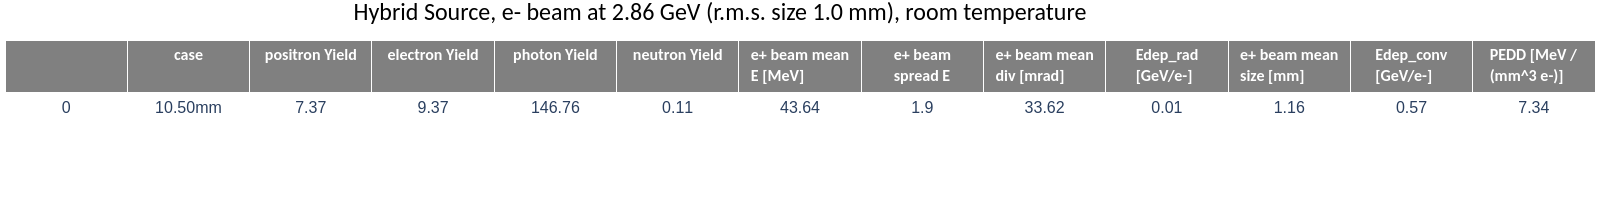

In [8]:
if save_results:
    save_dataframe(df_plot, outpath+"results_"+basename_G4, plot_title, figsize=(1600, fig_height), header_fontsize=16, cell_fontsize=16)

## Plot the columns of the dafaframe

In [9]:
if len(df_plot) > 1:
    for j in range(1, len(df_plot.columns)-1): 
        fig = plt.figure(figsize=(16, 10))
        fs = 18
        lw = 2
        ms = 8
        plt.plot(df_plot.case, df_plot.iloc[:,j].values, color='royalblue', \
                 linestyle='-', linewidth=lw, marker='o', markersize=ms, label='Accepted yield')
        #plt.legend(loc='lower right', fontsize=fs*0.65)
        plt.title(plot_title, fontsize=fs*0.75)
        plt.xlabel("case", fontsize=fs)
        plt.ylabel(df_plot.iloc[:,j].name, fontsize=fs)
        plt.xticks(fontsize=fs, rotation=rot_value)
        plt.yticks(fontsize=fs, rotation=0)
        #plt.ylim([0.5, 1.5])
        #plt.axvspan(1, 5, alpha=0.5, color='bisque')
        plt.grid(which="major", color="gray", linestyle="--", linewidth=1)
        if save_results:
            plotVarName = df_G4.iloc[:,j].name.replace('/','_')
            plt.savefig(outpath+plotVarName+"_"+basename_G4+".jpg", dpi=300)
        plt.show()